## Reto 4: Regresión Lineal Simple

### 1. Objetivos:
    - Utilizar Regresión Lineal Simple para intentar hacer predicciones entre pares de variables en nuestro dataset
 
---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Tu Reto consiste no solamente en realizar algunas Regresiones Lineales Simples, sino también en preparar un Notebook digno de ser presentado a tus compañeros y la experta. Ésta será la primera vez que hacemos algo así. No te sientas nervioso: ¡estás preparado!

Realiza los siguientes pasos:

1. Lee tu dataset y copia el código del Reto anterior a éste para tener disponible todo el trabajo que realizaste con valores atípicos.
2. Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.
3. Elige 3 pares de variables que te parezcan más prometedores para realizar predicciones.
4. Si es necesario, realiza un poco más de limpieza en esos 3 pares.
5. Por cada par, elige tu variable independiente y dependiente.
6. Crea un modelo por cada par de variables y entrénalos.
7. Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.
8. Obtén el coeficiente de determinación para cada una de tus regresiones.

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df_wine = pd.read_csv('https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/Datasets/wine_quality_red-clean.csv', index_col=0)

In [4]:
df_wine['quality'] = df_wine['quality'].astype('category') 

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 216.2 KB


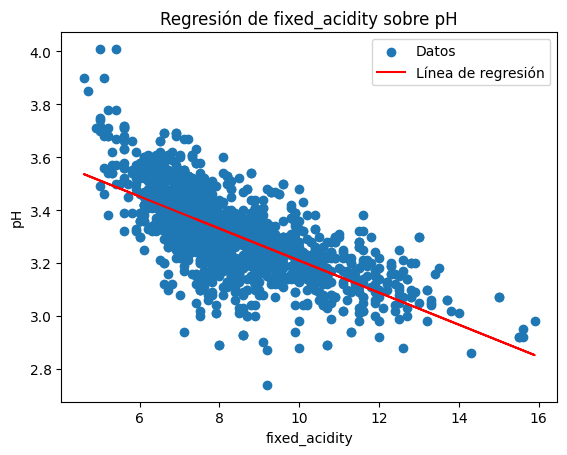

Coeficiente de determinación (R²) para fixed_acidity vs pH: 0.4664592142560905


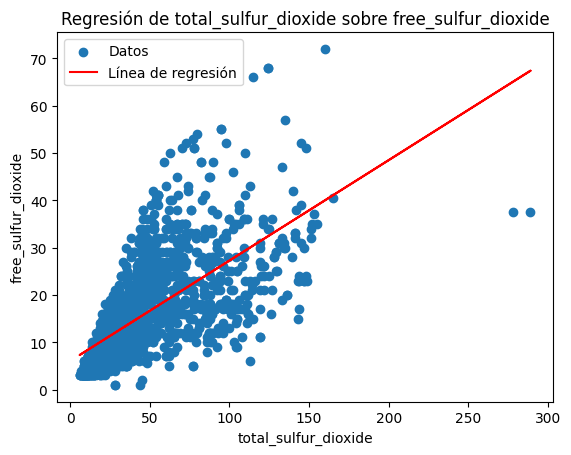

Coeficiente de determinación (R²) para total_sulfur_dioxide vs free_sulfur_dioxide: 0.4457784890979265


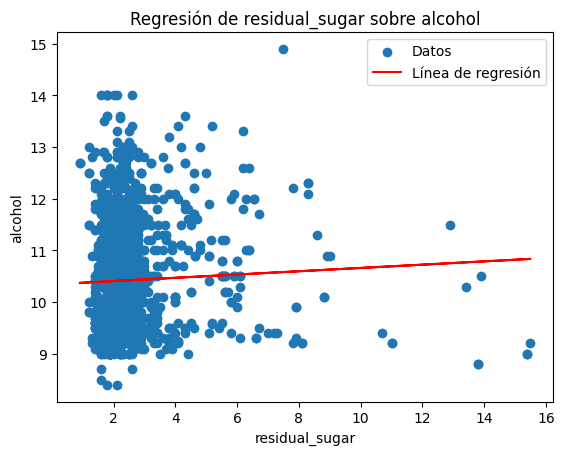

Coeficiente de determinación (R²) para residual_sugar vs alcohol: 0.0017703424163898474


In [10]:
def analizar_pares(df, pares):

    for par in pares:
        X = df[[par[0]]]
        y = df[par[1]]

        modelo = LinearRegression().fit(X, y)

        plt.scatter(X, y, label='Datos')
        plt.plot(X, modelo.predict(X), color='red', label='Línea de regresión')
        plt.title(f'Regresión de {par[0]} sobre {par[1]}')
        plt.xlabel(par[0])
        plt.ylabel(par[1])
        plt.legend()
        plt.show()

        r_cuadrado = modelo.score(X, y)
        print(f"Coeficiente de determinación (R²) para {par[0]} vs {par[1]}: {r_cuadrado}")

pares = [
    ('fixed_acidity', 'pH'),
    ('total_sulfur_dioxide', 'free_sulfur_dioxide'),
    ('residual_sugar', 'alcohol')
]


analizar_pares(df_wine, pares)


# Opcional

In [14]:
import statsmodels.api as sm
import scipy.stats as stats

def verificar_supuestos(df, variable_independiente, variable_dependiente):
    """
    Verifica los supuestos para la regresión lineal en un par de variables.

    :param df: DataFrame que contiene los datos.
    :param variable_independiente: Nombre de la variable independiente.
    :param variable_dependiente: Nombre de la variable dependiente.
    """
    # Ajustar modelo de regresión
    X = df[[variable_independiente]]
    y = df[variable_dependiente]
    modelo = LinearRegression().fit(X, y)
    predicciones = modelo.predict(X)
    residuos = y - predicciones

    # Normalidad de los residuos
    plt.subplot(1, 2, 1)
    sns.histplot(residuos, kde=True)
    plt.title('Distribución de los Residuos')
    
    plt.subplot(1, 2, 2)
    stats.probplot(residuos, dist="norm", plot=plt)
    plt.title('Gráfico Q-Q de los Residuos')
    
    plt.tight_layout()
    plt.show()

    # Prueba de Shapiro-Wilk para normalidad
    shapiro_test = stats.shapiro(residuos)
    print(f"Prueba de Shapiro-Wilk: Estadístico={shapiro_test.statistic}, p-valor={shapiro_test.pvalue}")

    # Homocedasticidad (homogeneidad de varianza)
    plt.scatter(predicciones, residuos)
    plt.title('Residuos vs Predicciones')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

    # Prueba de Breusch-Pagan para homocedasticidad
    bp_test = sm.stats.diagnostic.het_breuschpagan(residuos, sm.add_constant(X))
    print(f"Prueba de Breusch-Pagan: p-valor={bp_test[3]}")

Verificando supuestos para fixed_acidity y pH


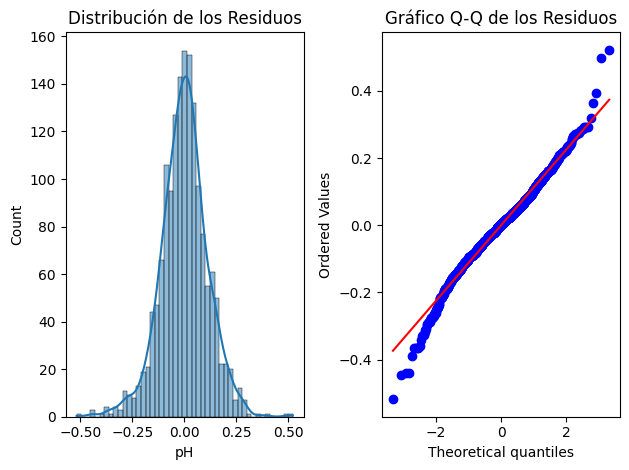

Prueba de Shapiro-Wilk: Estadístico=0.9867033958435059, p-valor=5.829082355690574e-11


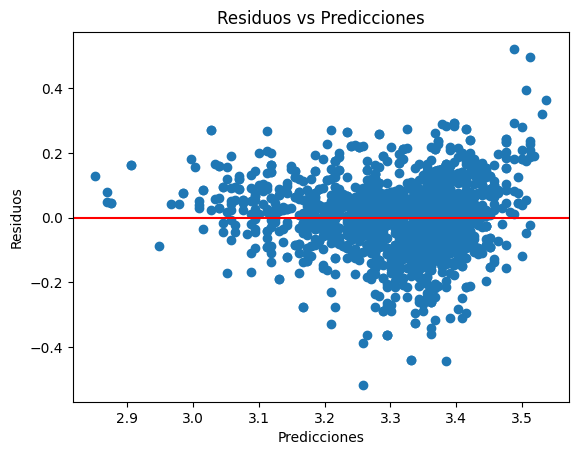

Prueba de Breusch-Pagan: p-valor=0.0006245558315190757


Verificando supuestos para total_sulfur_dioxide y free_sulfur_dioxide


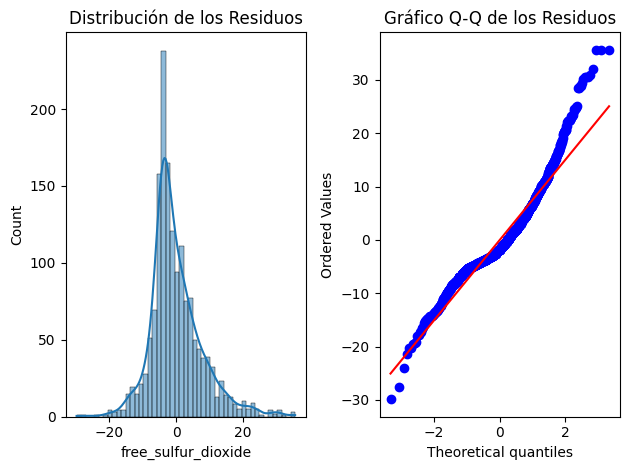

Prueba de Shapiro-Wilk: Estadístico=0.9322540760040283, p-valor=2.507546766822186e-26


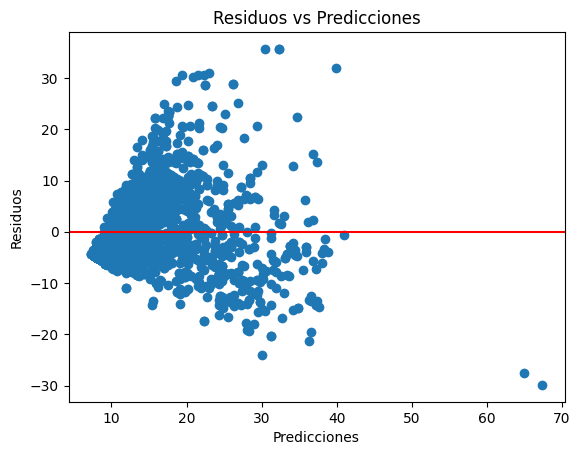

Prueba de Breusch-Pagan: p-valor=1.4532099693309532e-60


Verificando supuestos para residual_sugar y alcohol


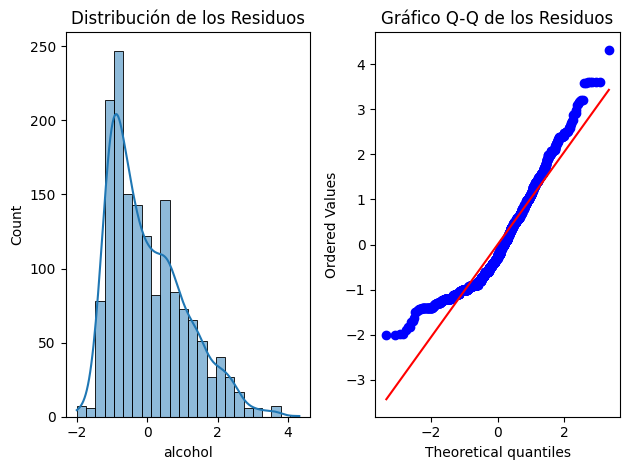

Prueba de Shapiro-Wilk: Estadístico=0.9330867528915405, p-valor=3.4935207470242004e-26


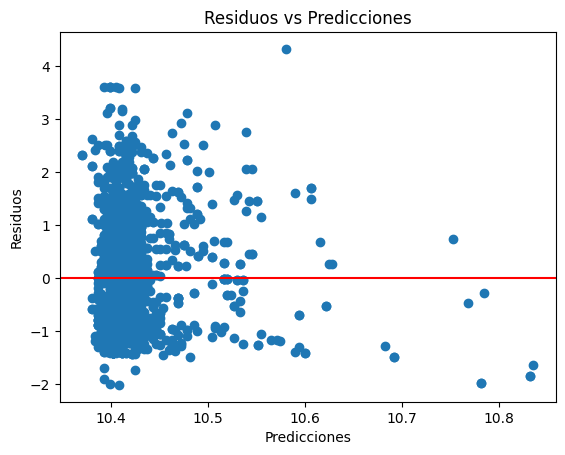

Prueba de Breusch-Pagan: p-valor=0.001065328611110775




In [15]:
pares = [
    ('fixed_acidity', 'pH'),
    ('total_sulfur_dioxide', 'free_sulfur_dioxide'),
    ('residual_sugar', 'alcohol')
]

for par in pares:
    print(f"Verificando supuestos para {par[0]} y {par[1]}")
    verificar_supuestos(df_wine, par[0], par[1])
    print("\n")

Cuando usamos regresión lineal (un método para predecir una cosa basándonos en otra), es crucial que los errores de nuestras predicciones se comporten bien. Estos errores, o "residuos", son la diferencia entre lo que nuestro modelo predice y lo que realmente sucede. Aquí te explico de forma sencilla por qué miramos estos errores y qué hacemos para verificar que están bien.

### ¿Por Qué Nos Fijamos en los Errores?

- **Nos Dicen Qué Tan Bueno es el Modelo:**
  - Los errores nos muestran dónde se equivoca nuestro modelo. Si entendemos bien estos errores, sabremos mejor qué tan precisas son nuestras predicciones.

- **Indican Si Algo Anda Mal:**
  - Si los errores muestran patrones raros o no son consistentes, puede ser una señal de que algo no está bien en cómo estamos haciendo las predicciones.

### Las Pruebas que Usamos

1. **Mirando los Errores en Gráficos:**
   - Usamos gráficos para ver si los errores se distribuyen de forma "normal". Esto sería formando una especie de campana en un gráfico, o siguiendo una línea recta en otro tipo de gráfico (Q-Q).

2. **Prueba de Shapiro-Wilk:**
   - Esta es una forma de probar matemáticamente si los errores son "normales". Nos da un número que, si es suficientemente grande, nos dice que todo está bien.

### Verificando que los Errores Sean Consistentes (Homocedasticidad)

- **Gráfico de Residuos vs. Predicciones:**
  - También queremos asegurarnos de que la cantidad de error no cambia mucho dependiendo de lo que estamos prediciendo. Para esto, usamos un gráfico especial que nos ayuda a ver si los errores son consistentes.

### ¿Por Qué Es Esto Importante?

- **Para Confiar en Nuestras Predicciones:**
  - Si los errores son normales y consistentes, podemos confiar más en lo que nuestro modelo nos dice.

- **Para Tomar Buenas Decisiones:**
  - Estas pruebas nos ayudan a estar seguros de que las decisiones basadas en nuestras predicciones son sólidas y confiables.

### ¿Qué Pasa si los Errores No Están Bien?

- **Podríamos Necesitar Ajustar Nuestro Modelo:**
  - Si los errores no se ven bien, podríamos tener que hacer cambios en nuestro modelo o incluso probar con otros métodos.
